array([<AxesSubplot: title={'center': 'Train'}, xlabel='index'>,
       <AxesSubplot: title={'center': 'Val'}, xlabel='index'>,
       <AxesSubplot: title={'center': 'Test'}, xlabel='index'>],
      dtype=object)

<Figure size 640x480 with 0 Axes>

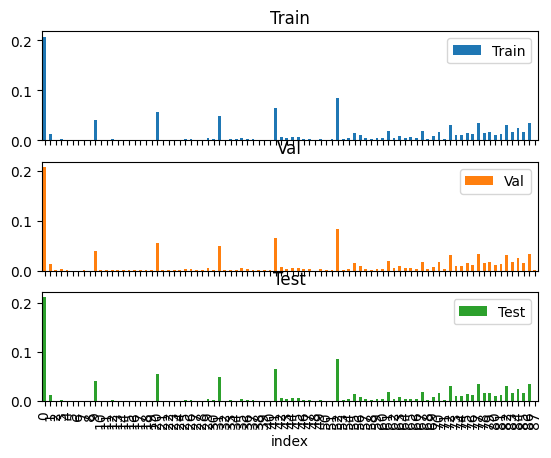

In [19]:
import pandas as pd

df = pd.read_csv("../../data/dataset/train.csv")
n_chain_ids = df['chain'].nunique()

def plot(path):
    df_part = pd.read_csv(path, names=['path', 'chain_id'], sep=' ')
    return df_part.chain_id.value_counts() / len(df_part)

# df.hist('chain', bins=n_chain_ids)
# from matplotlib import pyplot as plt
# plt.title("Chain With 0-Class")
# plt.show()
# 
# df[df.chain!=0].hist('chain', bins=n_chain_ids)
# plt.title("Chain without 0-Class")
# plt.show()

plt.figure()
chain_ids = []
chain_ids.append(plot("../../data/dataset/hotel_train_chain.csv"))
chain_ids.append(plot("../../data/dataset/hotel_val_chain.csv"))
chain_ids.append(plot("../../data/dataset/hotel_test_chain.csv"))
rel_freq = pd.concat(chain_ids, axis=1, keys=['Train', 'Val', 'Test']).reset_index()
rel_freq = rel_freq.sort_values(by='index')
rel_freq.plot.bar(x='index', subplots=True)
# plt.legend()

In [6]:
df = pd.read_csv("../../data/dataset/chain_id_weights.csv")
weight_chains = df[1:].weights.sum()
df = df[1:]
df.weights = df.weights / weight_chains
df.T

,1,2,3,4,5,6,7,8,9,10,...,78,79,80,81,82,83,84,85,86,87
chain_id,52.000000,41.000000,20.000000,31.000000,9.000000,86.000000,77.000000,72.000000,82.000000,84.000000,...,11.000000,10.000000,4.000000,18.000000,50.000000,2.000000,8.000000,48.000000,6.000000,5.000000
weights,0.000098,0.000126,0.000148,0.000167,0.000205,0.000241,0.000242,0.000264,0.000273,0.000327,...,0.028687,0.029834,0.031077,0.037293,0.062155,0.067805,0.093232,0.093232,0.093232,0.093232
